In [1]:
#standard ds imports
import pandas as pd
import numpy as np
import os

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#import custom modules
from env import get_db_url

#import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

# Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

## 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [2]:
from wrangle import clean_zillow

In [3]:
df = clean_zillow()

In [4]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,NaN
1,17052889,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,NaN
2,14186244,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,NaN
3,12177905,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,NaN
6,12095076,3.0,4.0,9.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,6.037461e+07,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,-0.001011,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54242 entries, 0 to 77573
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      54242 non-null  int64  
 1   bathroomcnt                   54242 non-null  float64
 2   bedroomcnt                    54242 non-null  float64
 3   buildingqualitytypeid         54242 non-null  float64
 4   calculatedfinishedsquarefeet  54242 non-null  float64
 5   fips                          54242 non-null  float64
 6   latitude                      54242 non-null  float64
 7   longitude                     54242 non-null  float64
 8   lotsizesquarefeet             54242 non-null  float64
 9   rawcensustractandblock        54242 non-null  float64
 10  regionidcity                  54242 non-null  float64
 11  regionidcounty                54242 non-null  float64
 12  regionidzip                   54242 non-null  float64
 13  r

## Summary Statistics

In [6]:
df.describe()


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
count,5.424200e+04,54242.000000,54242.000000,54242.000000,54242.000000,54242.000000,5.424200e+04,5.424200e+04,5.424200e+04,5.424200e+04,54242.000000,54242.000000,54242.000000,54242.000000,54242.000000,5.424200e+04,5.424200e+04,54242.0,5.424200e+04,54242.000000,54242.000000,0.0
mean,1.294291e+07,2.335155,3.321965,6.203330,1933.758766,6049.083330,3.402642e+07,-1.182039e+08,1.204350e+04,6.049399e+07,33543.975996,2546.829523,96626.329708,1.839184,1963.849858,1.960030e+05,5.237826e+05,2016.0,3.277796e+05,6384.838431,0.018084,NaN
std,2.175964e+06,1.049794,1.028826,1.397866,1007.815329,21.358082,2.700776e+05,3.587695e+05,8.714895e+04,2.119775e+05,48589.916371,792.639879,4527.588422,3.107598,23.146880,2.490128e+05,7.307637e+05,0.0,5.509545e+05,8496.934456,0.176907,NaN
min,1.071186e+07,0.000000,0.000000,1.000000,128.000000,6037.000000,3.333983e+07,-1.194753e+08,2.360000e+02,6.037101e+07,3491.000000,1286.000000,95982.000000,0.000000,1878.000000,1.290000e+02,3.254000e+03,2016.0,1.610000e+02,49.180000,-4.655420,NaN
25%,1.150373e+07,2.000000,3.000000,6.000000,1276.000000,6037.000000,3.383436e+07,-1.184064e+08,5.499000e+03,6.037401e+07,12447.000000,1286.000000,96204.000000,0.000000,1950.000000,7.867900e+04,1.967500e+05,2016.0,7.748150e+04,2684.687500,-0.024809,NaN
50%,1.255037e+07,2.000000,3.000000,6.000000,1666.000000,6037.000000,3.403151e+07,-1.181619e+08,6.795000e+03,6.037602e+07,24832.000000,3101.000000,96410.000000,0.000000,1962.000000,1.339710e+05,3.725660e+05,2016.0,2.157315e+05,4644.435000,0.007036,NaN
75%,1.411076e+07,3.000000,4.000000,7.000000,2315.000000,6059.000000,3.418705e+07,-1.179369e+08,8.711000e+03,6.059042e+07,41673.000000,3101.000000,96995.000000,5.000000,1980.000000,2.267048e+05,6.132178e+05,2016.0,4.044385e+05,7326.222500,0.040903,NaN
max,1.629608e+08,18.000000,16.000000,12.000000,21929.000000,6111.000000,3.481877e+07,-1.175723e+08,6.971010e+06,6.111009e+07,396556.000000,3101.000000,399675.000000,15.000000,2016.000000,9.164901e+06,4.906124e+07,2016.0,4.895220e+07,586639.300000,5.262999,NaN


## DF Columns

In [7]:
df.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate'],
      dtype='object')

In [8]:
df.drop(['assessmentyear', 'taxamount', 'transactiondate', 'latitude', 'longitude'], axis=1, inplace=True)

## Split Data: train, validate, test

In [9]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)


train observations:  516375
validate observations:  221306
test observations:  184433


## Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [11]:
df.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'lotsizesquarefeet',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'logerror'],
      dtype='object')

In [12]:
not_scled = ['parcelid', 'buildingqualitytypeid', 'regionidcity', 'regionidcounty', 'regionidzip', 'logerror']

In [13]:
to_scale = ['bathroomcnt', 'bedroomcnt', 
            'calculatedfinishedsquarefeet', 'fips', 'lotsizesquarefeet',
            'rawcensustractandblock', 
            'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
            'taxvaluedollarcnt', 'landtaxvaluedollarcnt']

In [14]:
def scale_data(train, 
               validate, 
               test, 
               to_scale):
    #make copies for scaling
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()

    #scale them!
    #make the thing
    scaler = MinMaxScaler()

    #fit the thing
    scaler.fit(train[to_scale])

    #use the thing
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled

# Univariate 

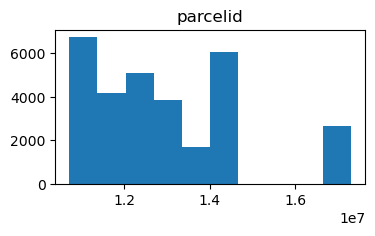

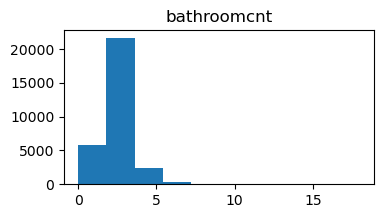

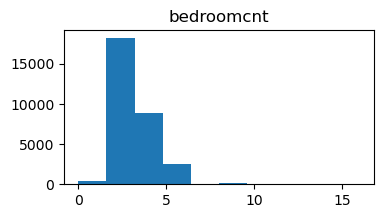

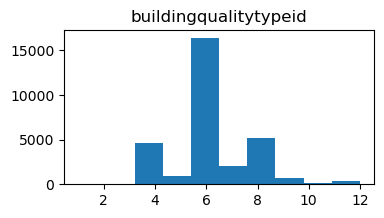

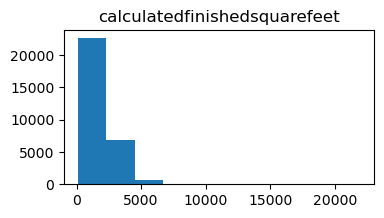

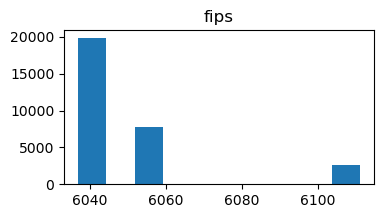

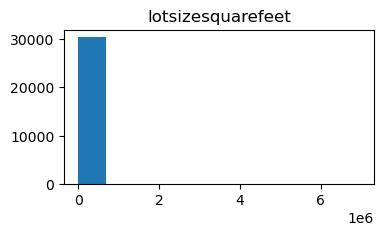

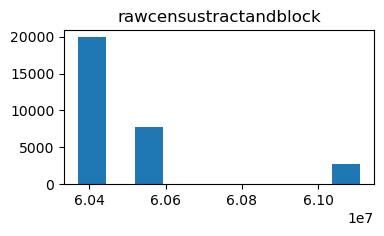

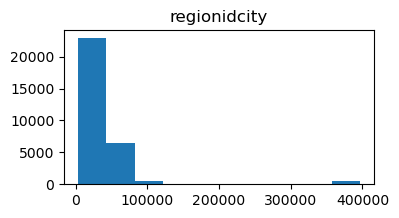

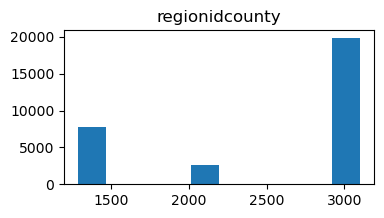

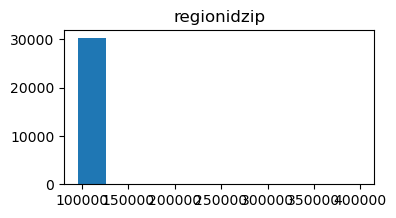

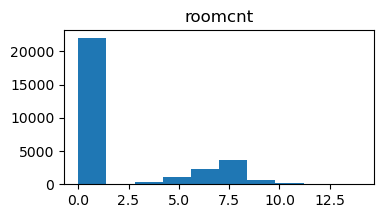

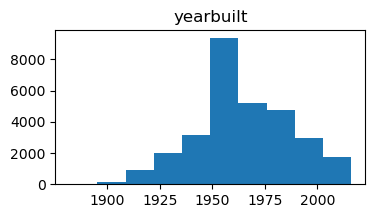

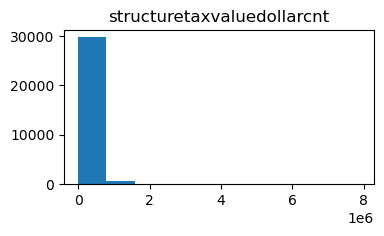

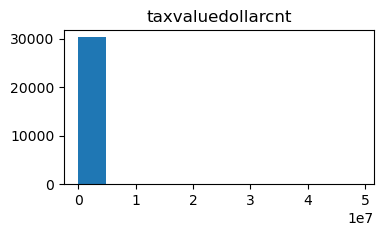

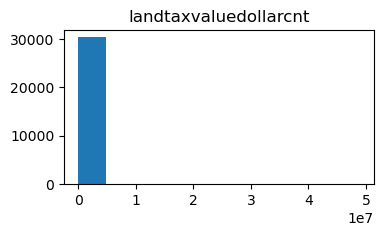

In [15]:

for col in train.drop(columns='logerror').columns:
    column_data = train[col].dropna()
    plt.figure(figsize=(4, 2))
    plt.hist(column_data)
    plt.title(col)
    plt.show()


## Conclusion:

### year_built and latitude are normally distributed.

### bedroomcnt, calculatedfinishedsquarefeet, and regionidcityare skewed right. longitude is skewed left. I will want to use spearman's correlation test when testing the linear relationships due to the skew.

### The sample has most of the properties in fips county code 6037.


In [18]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, to_scale)

In [19]:
def plot_variable_pairs(df):
    sns.set(style="ticks")
    sns.pairplot(df, kind="reg", diag_kind="kde", plot_kws={"line_kws": {"color": "red"}}, corner="lower")
    plt.show()

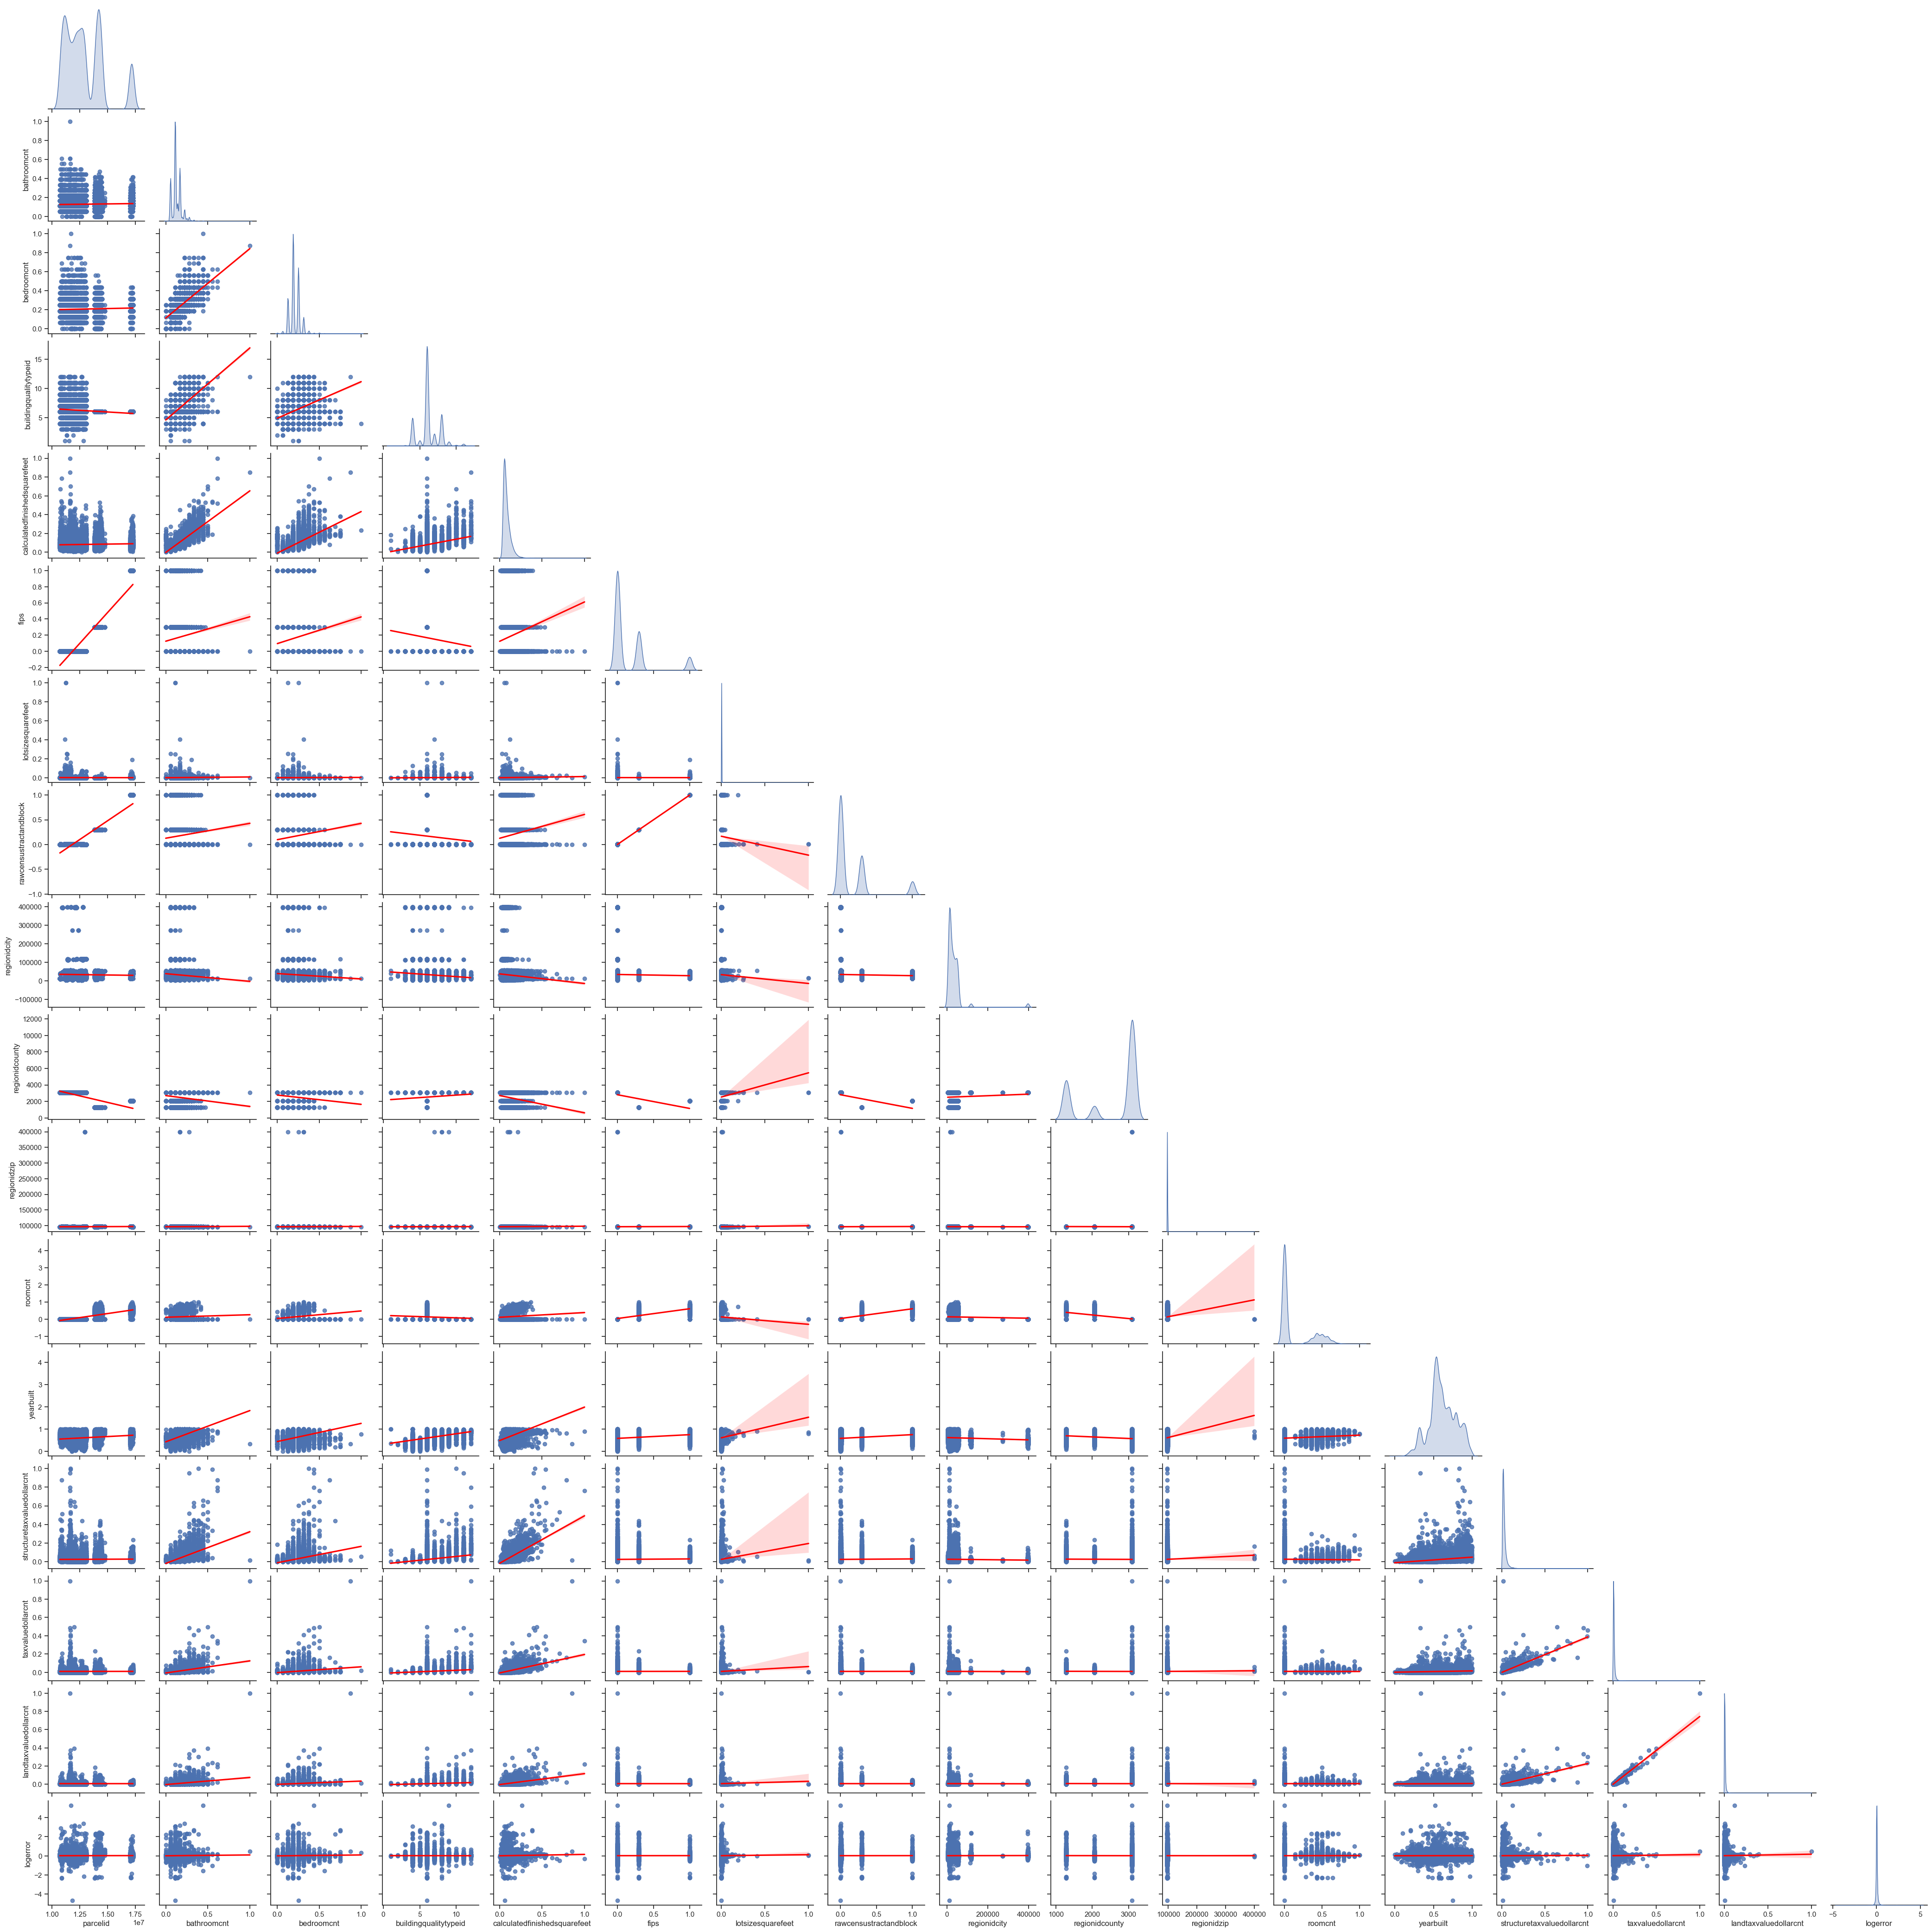

In [20]:
plot_variable_pairs(train_scaled)

---

In [21]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,logerror
0,14297519,3.5,4.0,6.0,3100.0,6059.0,4506.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,537569.0,0.025595
1,17052889,1.0,2.0,6.0,1465.0,6111.0,12647.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,376000.0,0.055619
2,14186244,2.0,3.0,6.0,1243.0,6059.0,8432.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,479489.0,0.005383
3,12177905,3.0,4.0,8.0,2376.0,6037.0,13038.0,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,36225.0,-0.103410
6,12095076,3.0,4.0,9.0,2962.0,6037.0,63000.0,6.037461e+07,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,496619.0,-0.001011


## 2. Answer those questions through a mix of statistical tests and visualizations.

### How does Lot Size have a relationship with log error?

Is there a relationship
between lot size and log error?


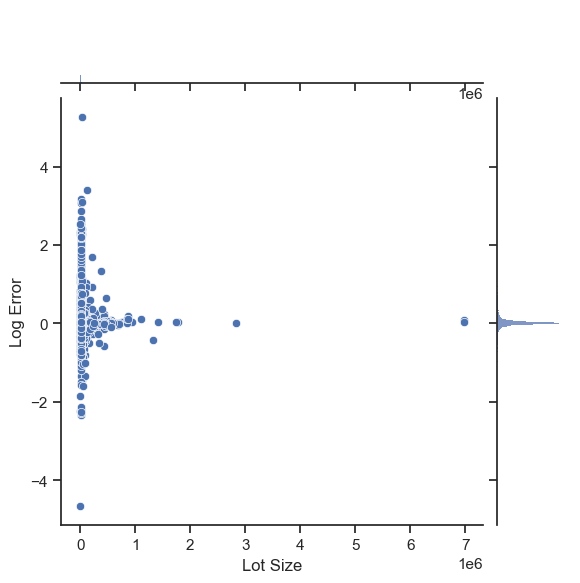

In [22]:
print("Is there a relationship\nbetween lot size and log error?")
sns.jointplot(x="lotsizesquarefeet", y="logerror", data=train)
plt.xlabel("Lot Size")
plt.ylabel("Log Error")
plt.show()

## Conclusion:
### There is a linear relationship between lotsizesquarefeet and logerror. Let's test.

H
0
: There is no linear correlation between the log error and the lot size.

H
a
: There is linear correlation between the log error and the lot size.

## Correlation Coefficient

In [23]:
from math import sqrt

n = df.shape[0]    
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 
α = 1 - conf_interval



x = train.lotsizesquarefeet
y = train.logerror


def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)


variance = ((x - x.mean()) ** 2).sum() / n

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy


0.005821905095164476

## T-value
The t-value helps us determine whether the observed correlation between two variables is likely due to a real relationship between those variables or simply due to random chance in the sample data

In [24]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t


1.3559145536783488

In [25]:
from scipy import stats

p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p


0.17513200122886538

In [26]:
p < α


False

Since p is not less than alpha, we cannot reject our null hypothesis so there is no relationship

### does building quality type id that have a relationship with log error?

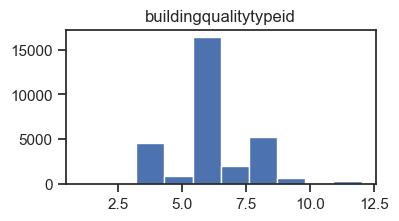

In [27]:

plt.figure(figsize=(4, 2))
plt.hist(train['buildingqualitytypeid'] )
plt.title('buildingqualitytypeid')
plt.show()

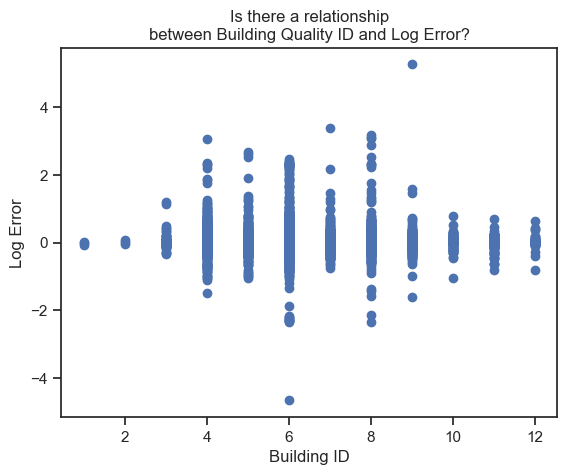

In [28]:
# plot age by spending_score
plt.scatter(train.buildingqualitytypeid, train.logerror)
plt.xlabel("Building ID")
plt.ylabel("Log Error")
plt.title("Is there a relationship\nbetween Building Quality ID and Log Error?")
plt.show()


## Conclusion:
### There is a linear relationship between buildingqualitytypeid and logerror. Let's test.

## Correlation Coefficient

In [29]:
from math import sqrt

n = df.shape[0]    
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 
α = 1 - conf_interval



x = train.buildingqualitytypeid
y = train.logerror


def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)


variance = ((x - x.mean()) ** 2).sum() / n

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy


-0.005938395921022793

## T-value
The t-value helps us determine whether the observed correlation between two variables is likely due to a real relationship between those variables or simply due to random chance in the sample data

In [30]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

-1.3830460714926516

In [31]:
from scipy import stats

p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p


1.833343567188095

In [32]:
p < α


False

### What is the relationship of log error with year built?

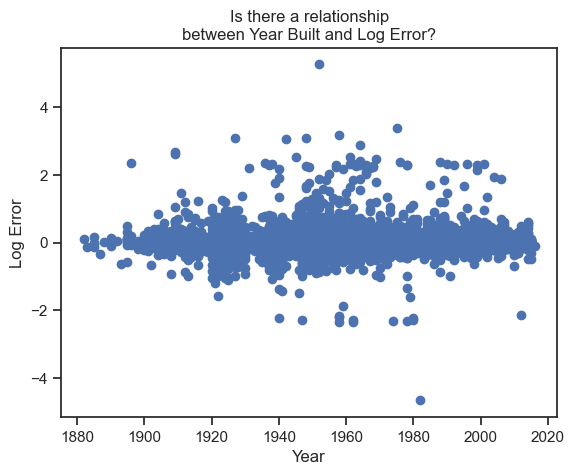

In [33]:
# plot age by spending_score
plt.scatter(train.yearbuilt, train.logerror)
plt.xlabel("Year")
plt.ylabel("Log Error")
plt.title("Is there a relationship\nbetween Year Built and Log Error?")
plt.show()


### If any findings, what bins may be helpful?

Binning logerror may be more helpful.

### What are the Top 3 Bedroom Numbers for the County averages?

In [38]:
df.fips.values

array([6059., 6111., 6059., ..., 6111., 6037., 6037.])

In [50]:
df[df['fips']==6059].bedroomcnt.sort_values(ascending=False).head()

66014    9.0
20379    9.0
54187    8.0
73061    8.0
76366    7.0
Name: bedroomcnt, dtype: float64

In [54]:
df[df['fips']==6111].bedroomcnt.sort_values(ascending=False).head(6)

10547    8.0
64216    7.0
39845    7.0
39448    7.0
65586    7.0
25798    6.0
Name: bedroomcnt, dtype: float64

In [56]:
df[df['fips']==6037].bedroomcnt.sort_values(ascending=False).head(3)

58856    16.0
8550     14.0
22476    12.0
Name: bedroomcnt, dtype: float64